In [54]:
import pandas as pd
import numpy as np

In [166]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pandas – Продолжение

```z = [0, 1, 1, 1, 0]
mean(z) = (0 + 1 + 1 + 1 + 0) / 5 = 3/5 = 0.6```

In [168]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [169]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

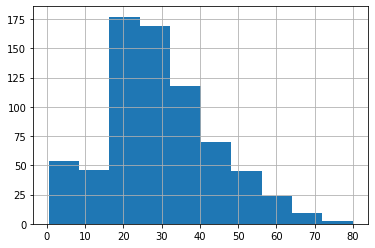

In [176]:
df.Age.hist(bins=10);

In [173]:
df1

,a,b
0,4,1
1,6,4
2,5,9
3,2,6
4,7,9
5,8,9
6,6,3
7,9,2
8,7,5
9,9,5


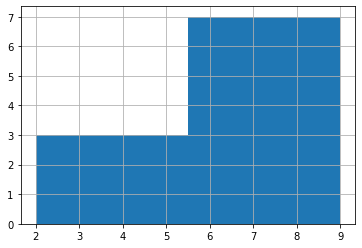

In [175]:
df1.a.hist(bins=2);

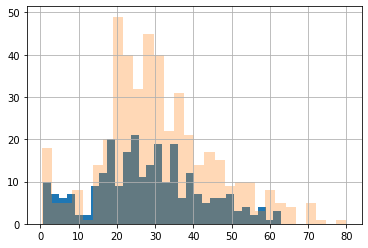

In [179]:
x = df[df['Sex'] == 'female']['Age'].hist(bins=30)
y = df[df['Sex'] == 'male']['Age'].hist(bins=30, alpha=0.3);

In [181]:
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

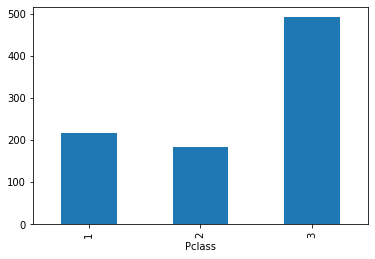

In [182]:
df.groupby('Pclass').size().plot(kind='bar');

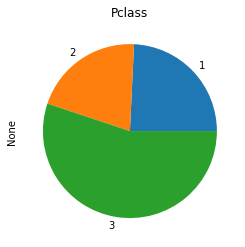

In [184]:
df.groupby('Pclass').size().plot(kind='pie', title='Pclass');

In [187]:
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

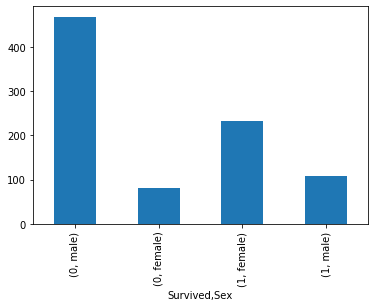

In [188]:
df.groupby('Survived')['Sex'].value_counts().plot(kind='bar');

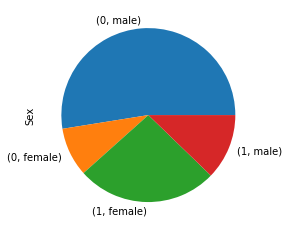

In [189]:
df.groupby('Survived')['Sex'].value_counts().plot(kind='pie');

In [193]:
df.groupby('Survived', as_index=False)['Sex'].value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [194]:
df.groupby('Survived')['Sex'].value_counts().unstack()

Sex,female,male
Survived,,
0,81,468
1,233,109


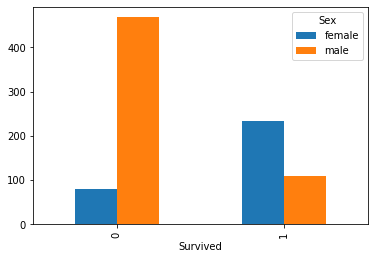

In [196]:
df.groupby('Survived')['Sex'].value_counts().unstack().plot(kind='bar');

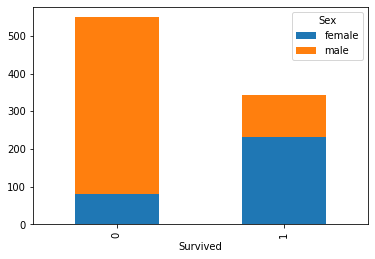

In [197]:
df.groupby('Survived')['Sex'].value_counts().unstack().plot(kind='bar', stacked=True);

In [201]:
df[df['Survived'] == 1].groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  1         91
        3         72
        2         70
male    3         47
        1         45
        2         17
Name: Pclass, dtype: int64

## Консультация

### 1

Было бы клёво, если бы мы разобрали домашку по нампай и пандас. Несмотря на то, что я, вроде бы, справился, замечательно было бы увидеть более адекватные и каноничные решения от профи :)

### 2

1) Как обращаться к отдельным элементам внутри np.array и матриц?
2) Хотелось бы поподробней про разницу между методами loc и iloc (если с примерами, то было бы вообще супер!)
3) Как вырезать часть датасета и сохранить его в таком виде?
4) Есть ли на сайте pandas и numpy страницы с полным списком методов?

#### 2.1

In [57]:
vec = np.array([1, 2, 3, 4, 5])
vec

array([1, 2, 3, 4, 5])

In [58]:
vec[0]

1

In [61]:
vec[1:4]

array([2, 3, 4])

In [62]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [82]:
matrix[:, 1] # обратились ко 2 колонке

array([2, 5])

In [84]:
matrix[0, :]

array([1, 2, 3])

In [85]:
matrix[:, 2]

array([3, 6])

In [81]:
matrix[0, 1]

2

In [68]:
matrix[0][1]

2

In [70]:
matrix[1][2]

6

In [9]:
matrix[0][1]

2

#### 2.2

`loc()` - это метод выбора данных на основе меток, что означает, что мы должны передать имя строки или столбца, которые мы хотим выбрать. Этот метод включает последний элемент переданного в нем диапазона, в отличие от `iloc()`. `loc()` может принимать логические данные в отличие от `iloc()`

In [71]:
df.loc[df['Age'] < df.Age.mean()].head() # логическое условие

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [72]:
df.loc[10:15] # ряды с 10 по 15 включительно

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [75]:
df.loc[(df['Sex'] == 'female'), 'Sex'] = 1 # обновить значения в колонке
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df.loc[(df['Sex'] == 1), 'Sex':'Fare']

,Sex,Age,SibSp,Parch,Ticket,Fare
1,1,38.0,1,0,PC 17599,71.2833
2,1,26.0,0,0,STON/O2. 3101282,7.9250
3,1,35.0,1,0,113803,53.1000
8,1,27.0,0,2,347742,11.1333
9,1,14.0,1,0,237736,30.0708
...,...,...,...,...,...,...
880,1,25.0,0,1,230433,26.0000
882,1,22.0,0,0,7552,10.5167
885,1,39.0,0,5,382652,29.1250
887,1,19.0,0,0,112053,30.0000


`iloc()` - это метод выбора на основе индекса, что означает, что мы должны передать целочисленный индекс в метод, чтобы выбрать конкретную строку / столбец. Этот метод не включает последний элемент переданного в нем диапазона, в отличие от `loc()`. `iloc()` не принимает логические данные в отличие от `loc()`

In [14]:
df.iloc[[155, 1, 289]] # берем несколько строк с разными индексами

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
289,290,1,3,"Connolly, Miss. Kate",1,22.0,0,0,370373,7.7500,NaN,Q


In [15]:
df.iloc[378:390, 4:7] # выбрали нужные строчки и столбцы одновременно

,Sex,Age,SibSp
378,male,20.0,0
379,male,19.0,0
380,1,42.0,0
381,1,1.0,0
382,male,32.0,0
383,1,35.0,1
384,male,NaN,0
385,male,18.0,0
386,male,1.0,5
387,1,36.0,0


#### 2.3

In [101]:
df.iloc[378:390, 4:7].to_csv('kusochek_data.csv', index=True)

In [103]:
kusochek = pd.read_csv('kusochek_data.csv')
kusochek.head()

,Unnamed: 0,Sex,Age,SibSp
0,378,male,20.0,0
1,379,male,19.0,0
2,380,1,42.0,0
3,381,1,1.0,0
4,382,male,32.0,0


In [105]:
df.iloc[378:390, 4:7].to_excel('kusochek_data.xlsx', index=False)

In [106]:
kusochek2 = pd.read_excel('kusochek_data.xlsx')
kusochek2.head()

,Sex,Age,SibSp
0,male,20.0,0
1,male,19.0,0
2,1,42.0,0
3,1,1.0,0
4,male,32.0,0


In [95]:
piece_of_df = df.iloc[378:390, 4:7].copy()

In [96]:
piece_of_df.loc[(piece_of_df.Sex == 'male'), 'Sex'] = 0

In [97]:
piece_of_df

,Sex,Age,SibSp
378,0,20.0,0
379,0,19.0,0
380,1,42.0,0
381,1,1.0,0
382,0,32.0,0
383,1,35.0,1
384,0,NaN,0
385,0,18.0,0
386,0,1.0,5
387,1,36.0,0


In [98]:
df.iloc[378:390]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
380,381,1,1,"Bidois, Miss. Rosalie",1,42.0,0,0,PC 17757,227.5250,NaN,C
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,NaN,C
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",1,35.0,1,0,113789,52.0000,NaN,S
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
387,388,1,2,"Buss, Miss. Kate",1,36.0,0,0,27849,13.0000,NaN,S


### 3

3 задание, я его решил так, но уверен, что есть более лаконичное решение с применением готовых решений из pandas или numpy,не могли бы подсказать как именно? И под средним возрастом в задачке вы имели в виду средний возраст среди всех пассажиров?


также не уверен, что адекватно решил 6 задание, весьма медленно выполняется, и опять же, думаю, что через pandas быстрее и с меньшим кодом можно решить задачу

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/DSFBL/1_python_public/main/lesson_10/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Сколько пассажирок 3 класса (именно женщин) с возрастом старше среднего было на корабле?

In [113]:
df[(df['Pclass'] == 3) & (df['Sex'] == 'female') & (df['Age'] > df['Age'].mean())].shape[0]

26

In [114]:
len(df[(df['Pclass'] == 3) & (df['Sex'] == 'female') & (df['Age'] > df['Age'].mean())])

26

In [110]:
df['Age'].mean()

29.69911764705882

Из колонки `Name` выделите имя (первое слово после титула). Запишите имена в отдельную колонку `FirstName`. Пример: для строчки `Braund, Mr. Owen Harris` именем будем считать `Owen`. Воспользуйтесь примером с `apply` с вебинара.

Найдите самое часто встречающееся значение в этой колонке. Запишите его в ответ без кавычек.

In [123]:
df['Name'][0].split(', ')[1].split('. ')[1].split()[0]

'Owen'

In [127]:
def get_first_name(string):
    return string.split(', ')[1].split('. ')[1].split()[0]

In [128]:
df['Name'].apply(get_first_name)

0           Owen
1           John
2          Laina
3        Jacques
4        William
         ...    
886       Juozas
887     Margaret
888    Catherine
889         Karl
890      Patrick
Name: Name, Length: 891, dtype: object

In [129]:
df['FirstName'] = df['Name'].apply(get_first_name)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,John
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jacques
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,William


In [134]:
df['FirstName'].value_counts().index[0]

'William'

### 4

1. Когда на вебинаре сортировали по возрасту и стоимости билета,по какому параметру происходит сортировка? как это возможно чтобы сортировка происходила сразу по 2 параметрам?
2. в задании 5 ДЗ надо сложить 2 значения SibSp и Parch. Функция get_family принимает 2 аргумента. Не понимаю синтаксис - как указать эти 2 столбца - SibSp и Parch перед .apply(get_family)
3. почему в 7 задании самое счасто встречающееся имя Анна, когда Элизабет на 1 больше? 
`У меня 14 Анн и 11 Элизабет:)`
4. в задании 10 надо сложить матрицу по столбцам. Почему правильный ответ -76398, если столбца 2 и числа соответственно тоже 2 : [-76398, 120991] `Введите в ответ первое число без пробелов`
5. в задании 3 правильный ответ 26, но у меня получается 27
int(df[df['Sex'] == 'female']['Age'].quantile(0.5)) кто эта лишняя женщиина?)))

In [165]:
df[df['Sex'] == 'female']['Age'].quantile(0.5)

27.0

In [162]:
df[df['Sex'] == 'female']['Age'].quantile(0.5)

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, Length: 314, dtype: float64

#### 4.1

In [144]:
pd.DataFrame(np.random.randint(1, 10, (10,2)), columns=['a','b'])

,a,b
0,4,4
1,8,6
2,2,4
3,8,2
4,4,6
5,1,2
6,1,8
7,2,2
8,8,6
9,7,4


In [156]:
np.random.randint(1, 10, (10,2))

array([[3, 9],
       [8, 6],
       [5, 4],
       [3, 6],
       [8, 3],
       [6, 9],
       [1, 9],
       [5, 1],
       [3, 6],
       [2, 3]])

In [158]:
np.random.seed(45)
df1 = pd.DataFrame(np.random.randint(1, 10, (10,2)), columns=['a','b'])
df1

,a,b
0,4,1
1,6,4
2,5,9
3,2,6
4,7,9
5,8,9
6,6,3
7,9,2
8,7,5
9,9,5


In [159]:
df1.sort_values(by='a', ascending=False)

,a,b
7,9,2
9,9,5
5,8,9
4,7,9
8,7,5
1,6,4
6,6,3
2,5,9
0,4,1
3,2,6


In [52]:
df1.sort_values(by=['a', 'b'], ascending=[False, True])

,a,b
7,9,2
9,9,5
5,8,9
8,7,5
4,7,9
6,6,3
1,6,4
2,5,9
0,4,1
3,2,6


In [160]:
df1.sort_values(by=['a', 'b'], ascending=[False, False])

,a,b
9,9,5
7,9,2
5,8,9
4,7,9
8,7,5
1,6,4
6,6,3
2,5,9
0,4,1
3,2,6


#### 4.2

Сложите колонки SibSp и Parch, запишите результат в колонку Family. Отсортируйте таблицу по этой колонке по убыванию. Выведите первые 7 строчек. Посмотрите на колонку Name. До запятой указана фамилия, после – титул и имя. Запишите в ответ фамилию этой семьи

In [53]:
df['Family'] = df['SibSp'] + df['Parch']
df.sort_values(by='Family', ascending=False).head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,Family
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Constance,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Douglas,10
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Stella,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Frederick,10
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Thomas,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Dorothy,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,George,10


#### 4.3

### 5

Привет! как в пандас можно объединять условия? np.round((df[df['SibSp'] != 0]['SibSp'] + df[df['Parch'] != 0]['Parch']).mean(), 2) => можно ли преобразовать во что-то вроде [df['SibSp'] != 0] & df['Parch'] != 0],['Parch']+['SibSp'] ?

### 6 

вопрос немного абстрактный - пользоваться гит в терминале - это полезный навык или так, баловство? он применим в настоящей работе?